Prior to running this script (specifically for the non noisy / non anomalous dataset), clean the main dataset (in our case the duplicates were removed prior to running this script). Once that has been done, this script can be run to create the normalized non noisy dataset that will need to be split.

In [1]:
from replica_processor import *

Welcome to JupyROOT 6.24/06


In [2]:
df = pd.read_csv('main_dfs.csv', dtype={'x':'int8','y':'int8','ftag_id':'int8','occ':'float32','hist_type':'int8','hist_id':'int16'})
df

,paths,x,y,occ,ftag_id,hist_type,hist_id
0,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,0,0.0,0,0,0
1,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,1,0.0,0,0,0
2,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,2,0.0,0,0,0
3,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,3,0.0,0,0,0
4,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,4,0.0,0,0,0
...,...,...,...,...,...,...,...
41235475,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,60,0.0,84,17,233
41235476,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,61,0.0,84,17,233
41235477,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,62,0.0,84,17,233
41235478,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,63,0.0,84,17,233


In [4]:
df['occ_0to1'] = [0]*df.shape[0]
df['occ_zscore'] = [0]*df.shape[0]
df['occ_robust'] = [0]*df.shape[0]
df

,paths,x,y,occ,ftag_id,hist_type,hist_id,occ_0to1,occ_zscore,occ_robust
0,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,0,0.0,0,0,0,0,0,0
1,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,1,0.0,0,0,0,0,0,0
2,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,2,0.0,0,0,0,0,0,0
3,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,3,0.0,0,0,0,0,0,0
4,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,4,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41235475,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,60,0.0,84,17,233,0,0,0
41235476,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,61,0.0,84,17,233,0,0,0
41235477,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,62,0.0,84,17,233,0,0,0
41235478,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,63,0.0,84,17,233,0,0,0


In [5]:
pd.options.mode.chained_assignment = None  # default='warn'

In [6]:
# Slow process because the pointwise calculation of minmax goes through a for loop

# Loop through ftags in df
for idf,ftid in enumerate(df['ftag_id'].unique()):
    
    # Progress update for current ftag processing..
    progress_bar(idf,df['ftag_id'].unique())
    
    # Set the subset of df whose ftag_id is ftid to tmp
    mask1 = df['ftag_id'] == ftid
    tmp = df.loc[mask1,:]
    
    # Loop through hists for the current ftag
    for hid in tmp['hist_id'].unique():
        
        # Progress update of histogram currently in process..
        print(hid)
        
        # Set the subset of tmp whose hist_id is hid to tmp2
        mask2 = tmp['hist_id'] == hid
        tmp2 = tmp.loc[mask2,:]

        # Calculate the normalization features and store them in their respective columns
        # MinMax scaling, not using standard deviation
        tmp2['occ_0to1'] = ( tmp2['occ']-tmp2['occ'].min() )/( tmp2['occ'].max()-tmp2['occ'].min() )
        
        # Zscore normalization
        tmp2['occ_zscore'] = ( tmp['occ']-tmp['occ'].mean() ) / tmp['occ'].std()
        
        # Robust normalization
        q75,q25 = np.percentile(tmp2['occ'],[75,25])
        iqr = q75-q25
        tmp2['occ_robust'] = ( tmp2['occ']-tmp2['occ'].median() )/iqr

        # Record the subset of datapoints whose normalized occupancies have been calculated into the main dataframe 
        df.loc[tmp2.index,:] = tmp2

Processing file 83 of 83 files... 100.0% Complete
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233


In [7]:
# Looks good so far
df

,paths,x,y,occ,ftag_id,hist_type,hist_id,occ_0to1,occ_zscore,occ_robust
0,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,0,0.0,0,0,0,0.0,-0.149630,-0.241575
1,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,1,0.0,0,0,0,0.0,-0.149630,-0.241575
2,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,2,0.0,0,0,0,0.0,-0.149630,-0.241575
3,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,3,0.0,0,0,0,0.0,-0.149630,-0.241575
4,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,4,0.0,0,0,0,0.0,-0.149630,-0.241575
...,...,...,...,...,...,...,...,...,...,...
41235475,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,60,0.0,84,17,233,0.0,-0.173805,-0.889612
41235476,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,61,0.0,84,17,233,0.0,-0.173805,-0.889612
41235477,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,62,0.0,84,17,233,0.0,-0.173805,-0.889612
41235478,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,63,0.0,84,17,233,0.0,-0.173805,-0.889612


<IPython.core.display.Javascript object>

,paths,x,y,occ,ftag_id,hist_type,hist_id,occ_0to1,occ_zscore,occ_robust
0,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,0,0.0,0,0,0,0.0,-0.14963,-0.241575
1,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,1,0.0,0,0,0,0.0,-0.14963,-0.241575
2,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,2,0.0,0,0,0,0.0,-0.14963,-0.241575
3,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,3,0.0,0,0,0,0.0,-0.14963,-0.241575
4,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,4,0.0,0,0,0,0.0,-0.14963,-0.241575


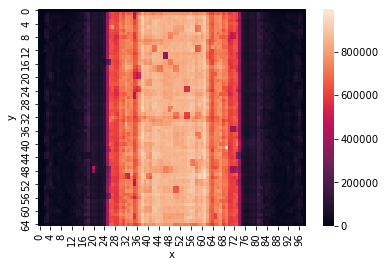

In [8]:
# Get a histogram subset to view some specifics
test = df[df['ftag_id']==0]
test = test[test['hist_id']==0]
sns.heatmap( test.pivot_table(index='y',columns='x',values='occ') )
test.head()

In [13]:
# display(test.describe())
# display(sns.displot(test['occ']))
# display(sns.displot(test['occ_zscore']))
# display(sns.displot(test['occ_robust']))
# display(sns.displot(test['occ_0to1']))
# test = test[test['x']==48]
# display(test)
# display(plt.hist(test['occ'],bins=100))
# display(plt.hist(test['occ_zscore'], bins=100))
# display(plt.hist(test['occ_robust'], bins=100))
# display(plt.hist(test['occ_0to1'], bins=100))
# # What kind of values does the zscore feature have
# display(test['occ_zscore'].value_counts())
# # What kind of values does the robust feature have?
# display(test['occ_robust'].value_counts())
# # What kind of values does the 0to1 feature have?
# display(test['occ_0to1'].value_counts())

In [11]:
df['quality'] = 0
df

,paths,x,y,occ,ftag_id,hist_type,hist_id,occ_0to1,occ_zscore,occ_robust,quality
0,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,0,0.0,0,0,0,0.0,-0.149630,-0.241575,0
1,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,1,0.0,0,0,0,0.0,-0.149630,-0.241575,0
2,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,2,0.0,0,0,0,0.0,-0.149630,-0.241575,0
3,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,3,0.0,0,0,0,0.0,-0.149630,-0.241575,0
4,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,4,0.0,0,0,0,0.0,-0.149630,-0.241575,0
...,...,...,...,...,...,...,...,...,...,...,...
41235475,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,60,0.0,84,17,233,0.0,-0.173805,-0.889612,0
41235476,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,61,0.0,84,17,233,0.0,-0.173805,-0.889612,0
41235477,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,62,0.0,84,17,233,0.0,-0.173805,-0.889612,0
41235478,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,63,0.0,84,17,233,0.0,-0.173805,-0.889612,0


In [12]:
df['occ_0to1'] = df['occ_0to1'].astype('float32')
df['occ_zscore'] = df['occ_zscore'].astype('float32')
df['occ_robust'] = df['occ_robust'].astype('float32')
df['quality'] = df['quality'].astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41235480 entries, 0 to 41235479
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   paths       object 
 1   x           int8   
 2   y           int8   
 3   occ         float32
 4   ftag_id     int8   
 5   hist_type   int8   
 6   hist_id     int16  
 7   occ_0to1    float32
 8   occ_zscore  float32
 9   occ_robust  float32
 10  quality     int8   
dtypes: float32(4), int16(1), int8(5), object(1)
memory usage: 1.2+ GB


In [13]:
# Save the results
df.to_csv('normed_nonanoms.csv',index=False)

In [ ]:
# To load, use the following
df = pd.read_csv('normed_nonanoms.csv', dtype={'x':'int8','y':'int8','ftag_id':'int8','occ':'float32','hist_type':'int8','hist_id':'int16','quality':'int8','occ_0to1':'float32','occ_zscore':'float32','occ_robust':'float32'})
df

Now, no further processing needed for these ,split them into x_train_nonnoisy_df and x_test_nonnoisy_df using non noisy split script